<a href="https://colab.research.google.com/github/utkarshsinghiitbhu/Time_Series_Forcasting/blob/main/AutoReg_ARIMA_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
df=pd.read_csv("/content/daily-min-temperatures.csv",index_col=0,parse_dates=True)
df.shape


(3650, 1)

In [ ]:
X=df.values

In [ ]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
print("After extracting only Temperature", X)

After extracting only Temperature [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

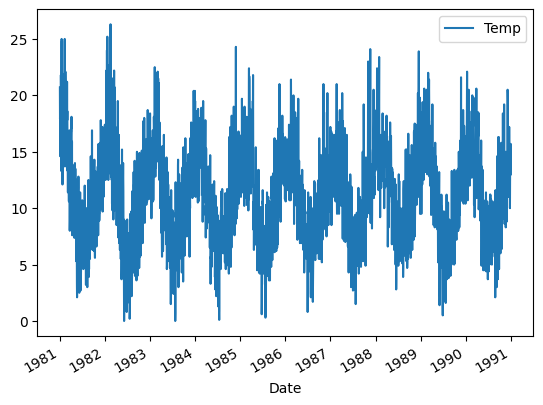

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df["Temp"], autolag='AIC')

print("1. ADF", dftest[0])
print("2. p-value", dftest[1])
print("3. No of Lags", dftest[2])
print("4. No of obs used for ADF Regression", dftest[3])

1. ADF -4.4448049246117
2. p-value 0.0002470826300360994
3. No of Lags 20
4. No of obs used for ADF Regression 3629


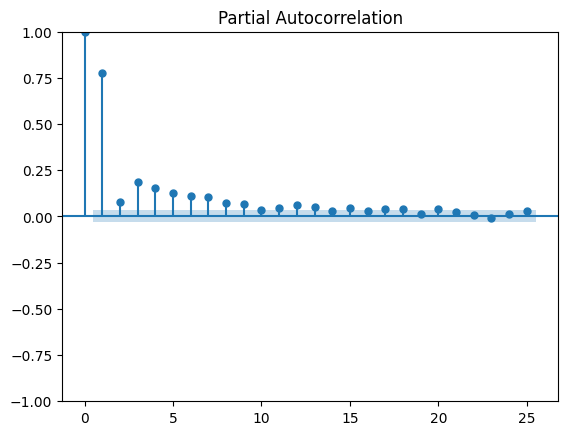

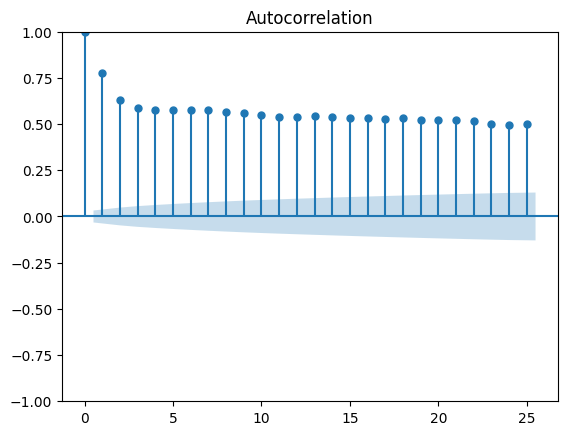

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf=plot_pacf(df["Temp"],lags=25)
acf=plot_acf(df["Temp"],lags=25)

In [ ]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [ ]:
model=AutoReg(train,lags=10).fit()

In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Tue, 04 Jun 2024   AIC                          16775.028
Time:                        12:52:45   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [ ]:
pred=model.predict(start=(len(train)),end=len(X)-1,dynamic=False)

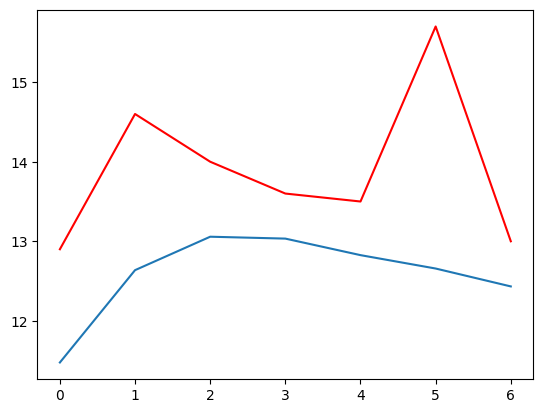

In [ ]:
plt.plot(pred)
plt.plot(test,color='red')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

1.563819622086056


In [ ]:
pred

array([11.47679312, 12.63726604, 13.0574664 , 13.03378918, 12.8259307 ,
       12.65767226, 12.43273596])

In [ ]:
test

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [ ]:
future_pred=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print(future_pred)
print("The no of future predictions made are",len(future_pred))

[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
The no of future predictions made are 7


# ARIMA MODEL

In [110]:
import pandas as pd
df=pd.read_csv('/content/MaunaLoaDailyTemps.csv',index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


<Axes: xlabel='DATE'>

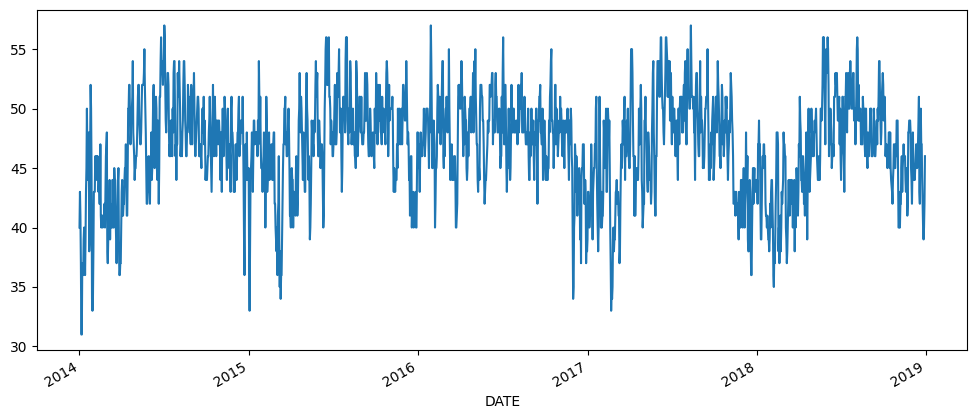

In [111]:
df['AvgTemp'].plot(figsize=(12,5))

In [113]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [114]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=5.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=5.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=5.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=6.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=7.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=8.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=6.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=6.92 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=6.98 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=8.37 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [115]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [122]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Tue, 04 Jun 2024   AIC                           8292.261
Time:                        13:56:10   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5285      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.909      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.000      -0.185      -0.095
ma.L2         -0.2328      0.023    -10.038      0.000      -0.278      -0.187
ma.L3         -0.2163      0.023     -9.280      0.000      -0.262      -0.171
ma.L4         -0.1478      0.023     -6.542      0.000      -0.192      -0.104
ma.L5         -0.0587      0.024     -2.424      0.015      -0.106      -0.011
sigma2         5.5080      0.173     31.925      0.000       5.170       5.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.69
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='DATE'>

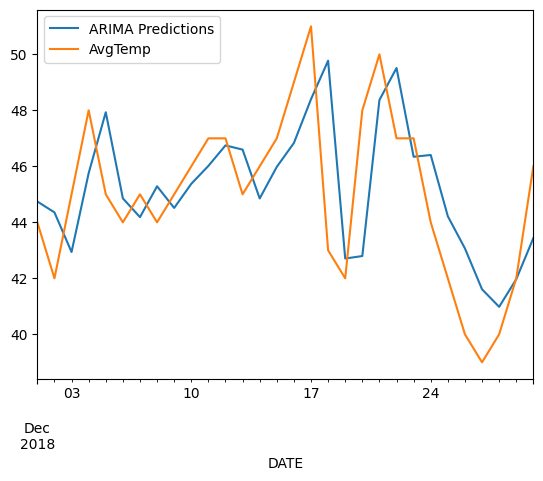

In [123]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=test.index
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [124]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.326315071740749


In [130]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')

In [131]:
pred=model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267394
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319591
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369628
2019-01-18    45.385842
2019-01-19    45.401830
2019-01-20    45.417593
2019-01-21    45.433137
2019-01-22    45.448462
2019-01-23    45.463574
2019-01-24    45.478474
2019-01-25    45.493165
2019-01-26    45.507651
2019-01-27    45.521934
2019-01-28    45.536017
2019-01-29    45.549904
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

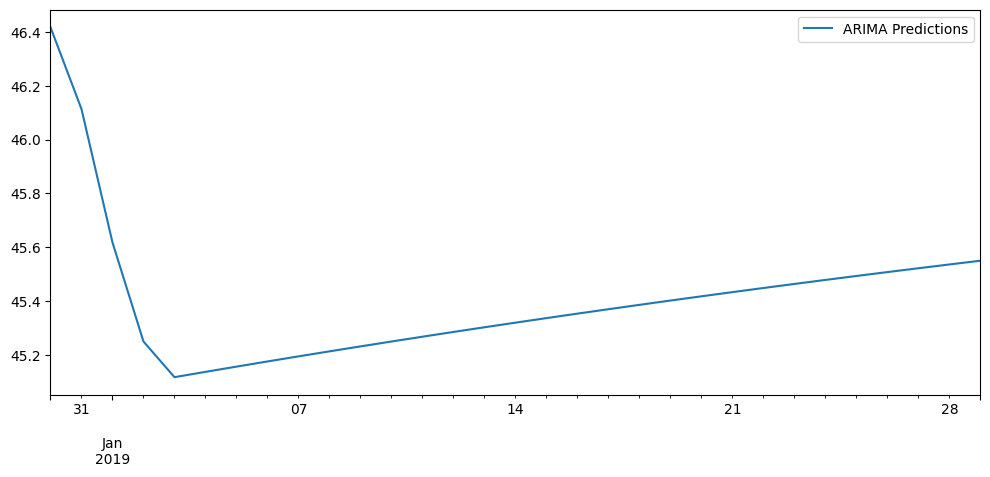

In [132]:
pred.plot(figsize=(12,5),legend=True)